# 卷积神经网络

## 1. 卷积神经网络的特征
- 局部感受
- 参数共享
- 池化

## 2. 卷积

下图展示卷积的过程
<img src="./images/conv.jpg" style="height: 60%;width: 60%; position: relative;right:10%">
- ### 3x3 的卷积滤波器的举例：
  - 1、stride=(1,1)
  - 2、每一个3x3 的部分 与 权重值[[1, 0, 1], [0, 1, 0], [1, 0, 1]]做卷积
  <img src="./images/kernel.png" style="height: 20%;width: 20%; position: relative;right:10%">
  - 3、最后加上偏置项0，得到右边的卷积特征。
- ### 卷积计算公式
   - s表示stride长度，p表示padding长度，原始图像的大小为nxn，filter的大小为fxf，卷积后的图像大小为
   <img src="./images/juanjigongshi.png">
- ### 卷积API介绍
  - tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs) <br />
      - filters: 滤波器的个数或者卷积核的个数，输入整数 <br />
      - kernel_size: 滤波器的大小或者卷积核的大小，输入整数，2个元素的元组或者list<br />
      - strides：卷积核移动的步长，默认是(1, 1)<br />
      - padding: 卷积是否补零，默认valid，表示不补零，如果为same，表示补零<br />
      - data_format: channels_last为(batch,height,width,channels),channels_first为(batch,channels,height,width)，
        默认为"NHWC"的格式<br />
      - dilation_rate: 膨胀率，默认为(1, 1)<br />
      - activation： 激活函数，例如tf.nn.relu<br />
      - use_bias: 是否使用偏置项，默认True，使用偏置项<br />
      - kernel_initializer: 卷积核或者卷积参数初始化，默认是glorot_uniform<br />
      - bias_initializer: 偏置项的初始化。默认是0<br />
      - kernel_regularizer：卷积核的正则项<br />
      - bias_regularizer: 偏置项的正则项<br />
      - activity_regularizer：对激活后的layer应用正则<br />
      - kernel_constraint： 卷积核使用约束函数<br />
      - bias_constraint： 偏置使用约束函数<br />

In [1]:
import tensorflow as tf

- ### 单个卷积核

In [2]:
image = tf.random.normal(shape=(12, 32, 32, 3))
## padding=valid
conv = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu",
                             kernel_initializer="glorot_uniform")(image)
print("conv shape: ", conv.shape)

conv shape:  (12, 30, 30, 1)


In [3]:
## padding=same
conv2 = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu",
                              kernel_initializer="he_normal", name="conv2")(conv)
print("conv2 shape: ", conv2.shape)

conv2 shape:  (12, 30, 30, 1)


- ### 多个卷积核

<img src="./images/cnn_kernels2.png" style="height: 60%;width: 60%; position: relative;right:10%">

In [4]:
conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu",
                             kernel_initializer="glorot_uniform", name="conv3")(image)
print("conv shape: ", conv3.shape)

conv shape:  (12, 30, 30, 64)


## 3. 激活函数
神经网络常见的激活函数有sigmoid，tanh，relu函数等，
<img src="./images/activate_function.png" style="height: 60%;width: 60%; position: relative;right:10%">

In [5]:
image = tf.random.normal(shape=(12, 32, 32, 3))
## padding=valid
conv4 = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="tanh",
                             kernel_initializer="glorot_uniform", name="conv4")(image)
print("conv shape: ", conv4.shape)

conv shape:  (12, 30, 30, 1)


In [6]:
conv5 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="valid", 
                               kernel_initializer="glorot_uniform", name="conv5")(image)
print("conv5 shape: ", conv5.shape)
conv5 = tf.nn.leaky_relu(conv5, alpha=0.2)
print("activation conv5 shape: ", conv5.shape)

conv5 shape:  (12, 30, 30, 64)
activation conv5 shape:  (12, 30, 30, 64)


## 4. 池化

下图展示最大池化
<img src="./images/maxpool.png" style="height: 60%;width: 60%; position: relative;right:10%">
- ### 2x2 最大池化举例说明
  - 最大池化的例子max pooling 用了 2x2 的滤波器 stride 为 2。四个 2x2 的颜色代表滤波器移动每个步长所产出的最大值
  - 最大池化操作的好处是减小输入大小，使得神经网络能够专注于最重要的元素。提取图片特征
- ### 池化API介绍
   - tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs)<br />
      - pool_size: 池化的滤波器大小，默认是2x2 <br />
      - strides: 池化滤波器移动步长的大小，可以是整数或者2个整数的元组 <br />
      - padding： 填充方式，默认方式是valid，表示不填充，same表示填充0，池化后的大小与原来的一样 <br />
      - data_format：数据格式，默认是channels_last，格式表示为(batch_size, rows, cols, channels)；如果是channels_first，
        格式表示为(batch_size, channels, rows, cols)。<br />
   - tf.nn.max_pool2d(input, ksize, strides, padding, data_format='NHWC', name=None)<br />
       - input: 张量，格式由data_format确定
       - ksize： 池化的滤波器的大小，可以是1个整数，两个整数，4个整数的元组
       - strides： 池化的滤波器移动的步长，可以是1个整数，两个整数，4个整数的元组
       - padding： 卷积填充的方式，如果是VALID，表示不填充，如果是SAME，表示填充0，卷积后的shape与input的shape相同
       - data_format： 数据格式，默认为NHWC

In [7]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="valid", name="max_pool1")(conv5)
print("max pooling shape: ", pool.shape)

max pooling shape:  (12, 15, 15, 64)


In [8]:
pool2 = tf.nn.max_pool2d(conv5, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding="SAME", name="max_pool2")
print("pool2 shape: ", pool2.shape)

pool2 shape:  (12, 15, 15, 64)


## 5. 例子
采用mnist数据集搭建一个卷积神经网络

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

- 加载mnist数据集

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("training data shape: ", x_train.shape)
print("training label shape: ", y_train.shape)
print("test data shape: ", x_test.shape)
print("test label shape: ", y_test.shape)

training data shape:  (60000, 28, 28)
training label shape:  (60000,)
test data shape:  (10000, 28, 28)
test label shape:  (10000,)


- 可视化mnist数据

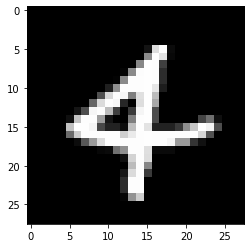

In [3]:
plt.imshow(x_train[150], cmap="gray")

Print 0 figure


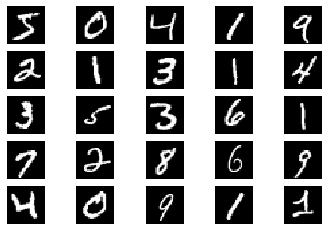

In [5]:
r,c=5,5
w,h=28,28
batch=r*c
totalNum=x_train.shape[0]
fig,axs=plt.subplots(r,c)
for i in range(0,25,batch):
    cur=x_train[i:i+batch]
    cnt=0
    for j in range(r):
        for k in range(c):
            axs[j,k].imshow(cur[cnt].reshape(w,h),cmap='gray')
            axs[j,k].axis('off')
            cnt+=1
    fig.savefig("./image/cnn_mnist/mnist_%d.png" % i)

- 数据特征处理

In [4]:
## 转换数据格式
x_train = x_train.astype('float32')/255
x_test = x_test.astype("float32")/255
##增加维度
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)

- 搭建cnn模型

In [5]:
model = tf.keras.Sequential()
## shape 28x28x64
model.add(tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3), strides=(1, 1), 
                                 kernel_initializer="glorot_uniform",
                                 padding="same", activation="relu", name="conv1"))
## shape 14x14x64
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="valid", name="max_pool1"))
## shape 14x14x128
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), kernel_initializer="glorot_uniform",
                                padding="same", activation="relu", name="conv2"))
## 7x7x128
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="valid", name="max_pool2"))
## 4x4x128
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),strides=(1, 1), kernel_initializer="glorot_uniform",
                                padding="same", activation="relu", name="conv3"))
## fc
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"))
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 64)        640       
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 7, 7, 128)         0         
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 7, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

- 训练模型

In [6]:
my_callbacks = [tf.keras.callbacks.ModelCheckpoint('./models/cnnmodel.h5', verbose=1),
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, mode='max')]
history = model.fit(x_train, y_train, batch_size=64, verbose=1, epochs=10, callbacks=my_callbacks, 
                    validation_data=(x_test, y_test))#
### validation_split
# history = model.fit(x_train, y_train, batch_size=64, verbose=1, epoches=10, callbacks=my_callbacks,
#                    validation_split=0.1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.1521 - accuracy: 0.9518
Epoch 00001: saving model to ./logs/cnnmodel.h5
60000/60000 [==============================] - 54s 900us/sample - loss: 0.1520 - accuracy: 0.9518 - val_loss: 0.0414 - val_accuracy: 0.9859
Epoch 2/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0496 - accuracy: 0.9854
Epoch 00002: saving model to ./logs/cnnmodel.h5
60000/60000 [==============================] - 52s 871us/sample - loss: 0.0496 - accuracy: 0.9854 - val_loss: 0.0264 - val_accuracy: 0.9918
Epoch 3/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0338 - accuracy: 0.9904
Epoch 00003: saving model to ./logs/cnnmodel.h5
60000/60000 [==============================] - 53s 880us/sample - loss: 0.0338 - accuracy: 0.9904 - val_loss: 0.0318 - val_accuracy: 0.9902
Epoch 4/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0278 - acc

- 结果展示

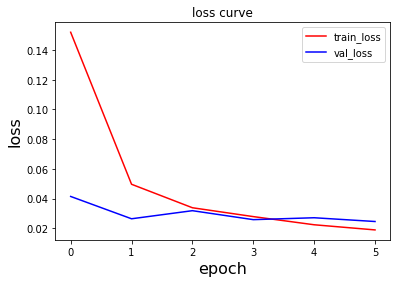

In [10]:
plt.plot(history.history["loss"], "r")
plt.plot(history.history["val_loss"], "b")
plt.legend(["train_loss", "val_loss"])
plt.xlabel("epoch", fontsize=16)
plt.ylabel("loss", fontsize=16)
plt.title("loss curve")
plt.savefig("./image/cnn_mnist/loss.png")
plt.show()

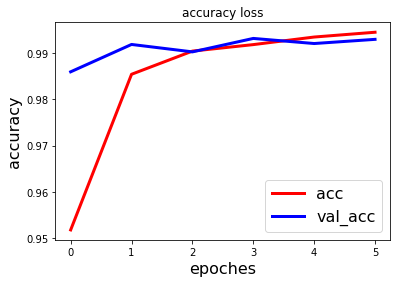

In [11]:
plt.plot(history.history["accuracy"], "r", linewidth=3.0)
plt.plot(history.history["val_accuracy"], "b", linewidth=3.0)
plt.legend(["acc", "val_acc"], fontsize=16)
plt.xlabel("epoches", fontsize=16)
plt.ylabel("accuracy", fontsize=16)
plt.title("accuracy loss")
plt.savefig("./image/cnn_mnist/accuracy.png")
plt.show()

- 模型显示

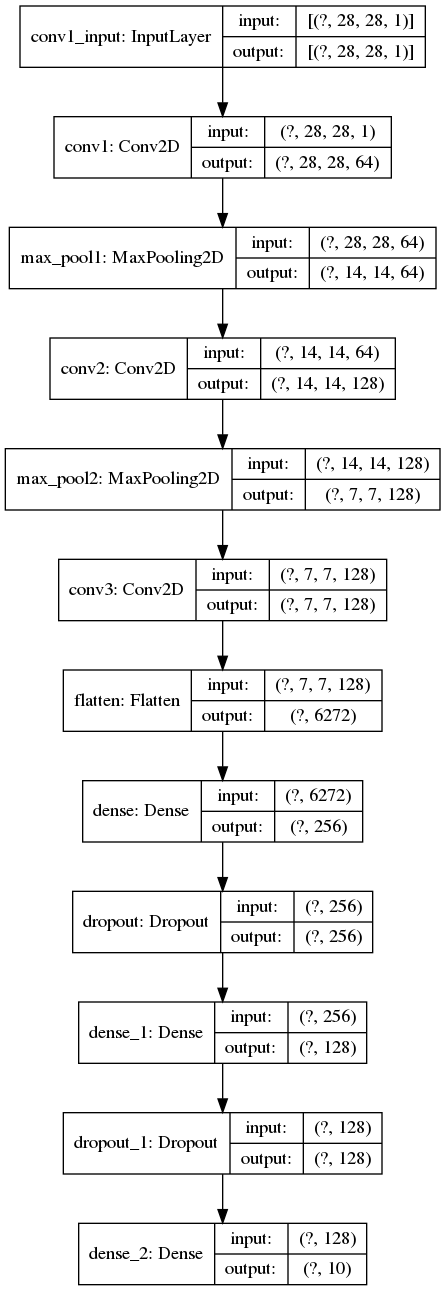

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

- 测试模型

In [13]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 242us/sample - loss: 0.0245 - accuracy: 0.9929
